In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gokulrajkmv/unemployment-in-india")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/unemployment-in-india


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import matplotlib.pyplot as plt
# Read CSV files
unemp=pd.read_csv(r'/kaggle/input/unemployment-in-india/Unemployment in India.csv')
unemp1=pd.read_csv(r'/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')
data=pd.concat([unemp,unemp1])
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,NaN,NaN,NaN
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,NaN,NaN,NaN
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,NaN,NaN,NaN
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310.0,40.39,NaN,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506.0,46.17,NaN,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644.0,47.48,NaN,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239.0,47.73,NaN,East,22.9868,87.855


In [ ]:
data.columns = data.columns.str.strip()
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data=data.rename(columns={'Region.1':'Region Direction'})
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region Direction,longitude,latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,NaN,NaN,NaN
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,NaN,NaN,NaN
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,NaN,NaN,NaN
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310.0,40.39,NaN,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506.0,46.17,NaN,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644.0,47.48,NaN,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239.0,47.73,NaN,East,22.9868,87.855


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1035 entries, 0 to 266
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   1007 non-null   object 
 1   Date                                     1007 non-null   object 
 2   Frequency                                1007 non-null   object 
 3   Estimated Unemployment Rate (%)          1007 non-null   float64
 4   Estimated Employed                       1007 non-null   float64
 5   Estimated Labour Participation Rate (%)  1007 non-null   float64
 6   Area                                     740 non-null    object 
 7   Region Direction                         267 non-null    object 
 8   longitude                                267 non-null    float64
 9   latitude                                 267 non-null    float64
dtypes: float64(5), object(5)
memory usage: 121.2+ KB


In [ ]:
data['Frequency']=data['Frequency'].replace('M','Monthly')
data['Date']=pd.to_datetime(data['Date'])
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region Direction,longitude,latitude
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,NaN,NaN,NaN
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,NaN,NaN,NaN
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,NaN,NaN,NaN
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,Monthly,7.29,30726310.0,40.39,NaN,East,22.9868,87.855
263,West Bengal,2020-07-31,Monthly,6.83,35372506.0,46.17,NaN,East,22.9868,87.855
264,West Bengal,2020-08-31,Monthly,14.87,33298644.0,47.48,NaN,East,22.9868,87.855
265,West Bengal,2020-09-30,Monthly,9.35,35707239.0,47.73,NaN,East,22.9868,87.855


In [ ]:
cleaneddata=data.dropna(subset=['Region'])
cleaneddata=data.drop(columns=['longitude','latitude'])
cleaneddata

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region Direction
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,NaN
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,NaN
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,NaN
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,NaN
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,NaN
...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,Monthly,7.29,30726310.0,40.39,NaN,East
263,West Bengal,2020-07-31,Monthly,6.83,35372506.0,46.17,NaN,East
264,West Bengal,2020-08-31,Monthly,14.87,33298644.0,47.48,NaN,East
265,West Bengal,2020-09-30,Monthly,9.35,35707239.0,47.73,NaN,East


In [ ]:
data.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,295
Region Direction,768
longitude,768
latitude,768


In [ ]:
data.duplicated().sum()

np.int64(27)

In [ ]:
cleaneddata['Region Direction'] = (
    cleaneddata.groupby('Region')['Region Direction']
    .transform(lambda x: x.ffill().bfill())
)
cleaneddata['Area'] = (
    cleaneddata.groupby('Region')['Area']
    .transform(lambda x: x.ffill().bfill())
)
cleaneddata

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region Direction
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,South
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,South
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,South
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,South
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,South
...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,Monthly,7.29,30726310.0,40.39,Urban,East
263,West Bengal,2020-07-31,Monthly,6.83,35372506.0,46.17,Urban,East
264,West Bengal,2020-08-31,Monthly,14.87,33298644.0,47.48,Urban,East
265,West Bengal,2020-09-30,Monthly,9.35,35707239.0,47.73,Urban,East


In [ ]:
cleaneddata[(cleaneddata['Date']=='2019-05-31') & (cleaneddata['Region']=='Andhra Pradesh') ]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region Direction
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,South
373,Andhra Pradesh,2019-05-31,Monthly,6.09,4788661.0,37.45,Urban,South


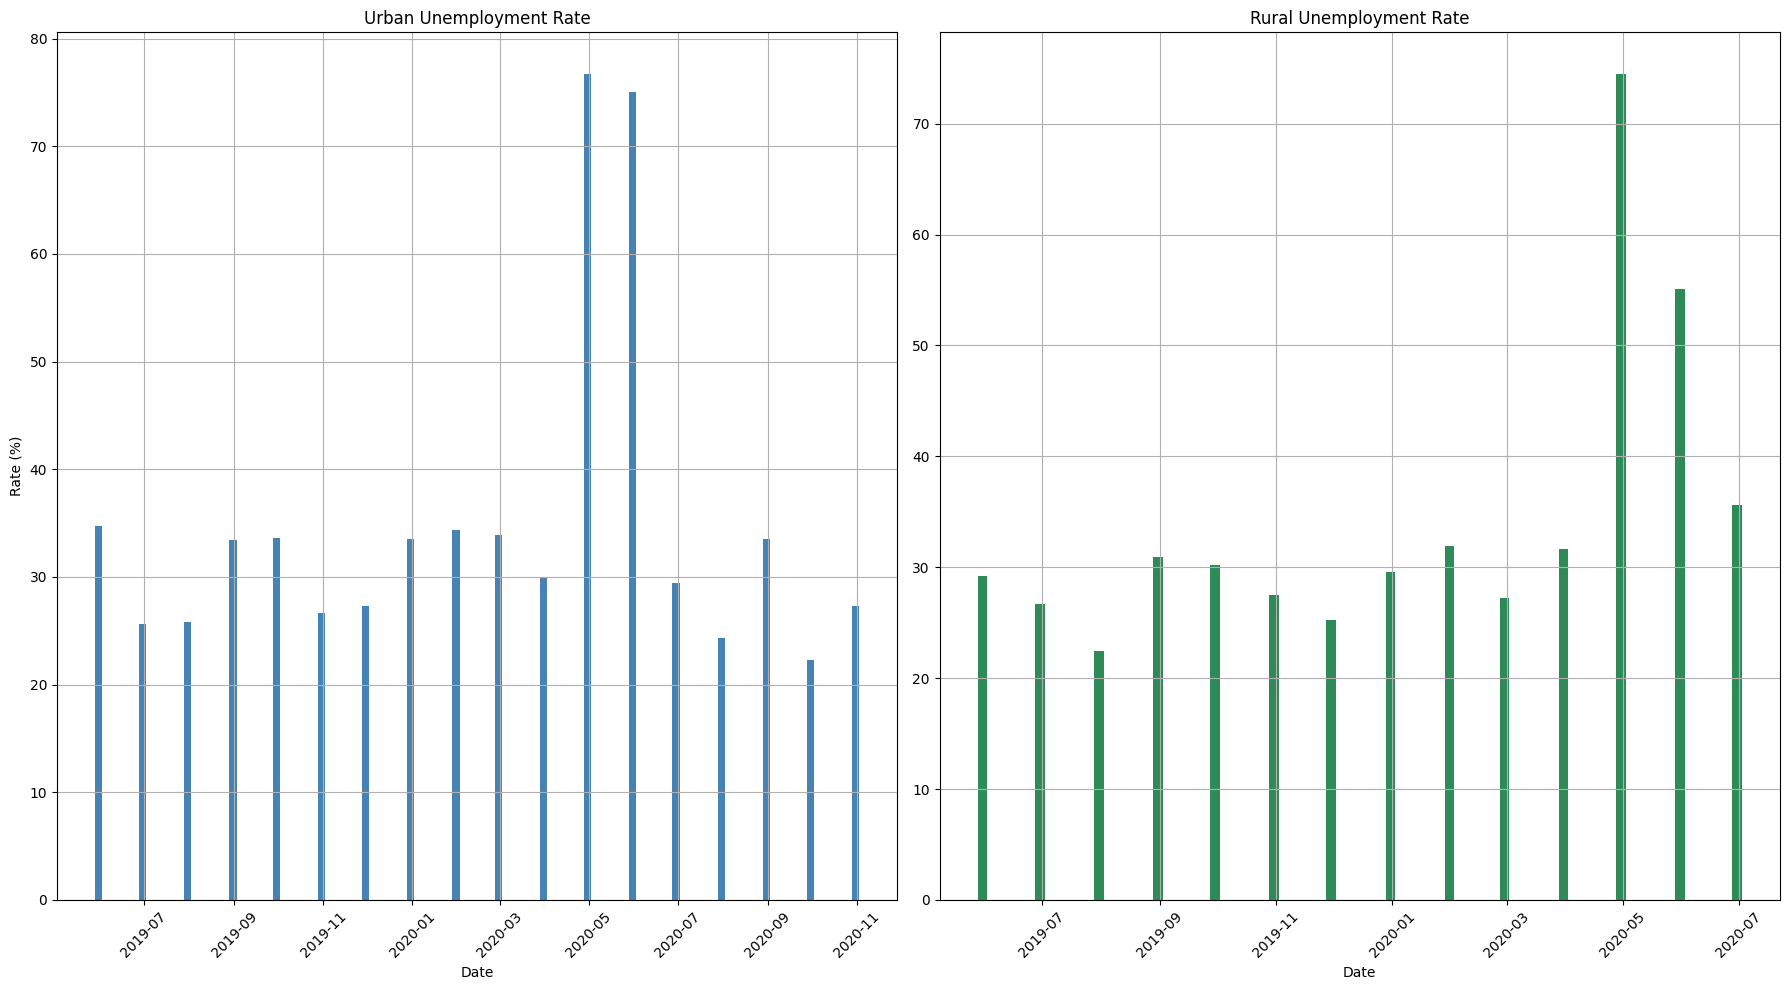

In [ ]:
urban=cleaneddata[cleaneddata['Area']=='Urban']
rural=cleaneddata[cleaneddata['Area']=='Rural']
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

# Urban Bar Plot
ax[0].bar(urban['Date'], urban['Estimated Unemployment Rate (%)'], color='steelblue',width=5)
ax[0].set_title('Urban Unemployment Rate')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Rate (%)')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True)

# Rural Bar Plot
ax[1].bar(rural['Date'], rural['Estimated Unemployment Rate (%)'], color='seagreen',width=5)
ax[1].set_title('Rural Unemployment Rate')
ax[1].set_xlabel('Date')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
pre_covid = data[data['Date'] < '2020-03-01']
post_covid = data[data['Date'] >= '2020-03-01']

pre_mean = pre_covid['Estimated Unemployment Rate (%)'].mean()
post_mean = post_covid['Estimated Unemployment Rate (%)'].mean()

print(f"Pre-Covid Unemployment Rate: {pre_mean:.2f}%")
print(f"Post-Covid Unemployment Rate: {post_mean:.2f}%")


Pre-Covid Unemployment Rate: 9.48%
Post-Covid Unemployment Rate: 15.31%


In [ ]:
post_covid.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head()


,Estimated Unemployment Rate (%)
Region,
Haryana,31.617500
Puducherry,29.343571
Jharkhand,28.982500
Bihar,26.678750
Tripura,25.193750


<Axes: xlabel='Date'>

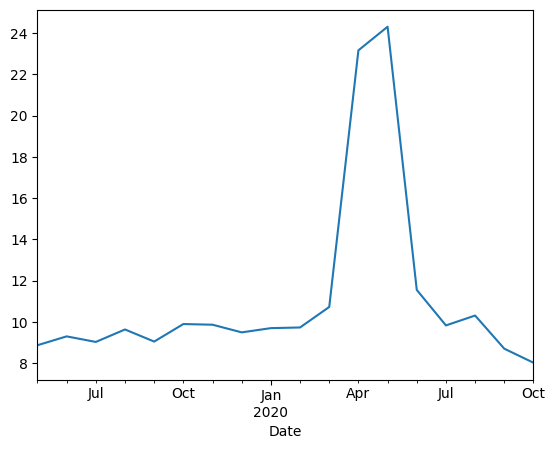

In [ ]:
cleaneddata.groupby('Date')['Estimated Unemployment Rate (%)'].mean().plot()


<Axes: ylabel='Region'>

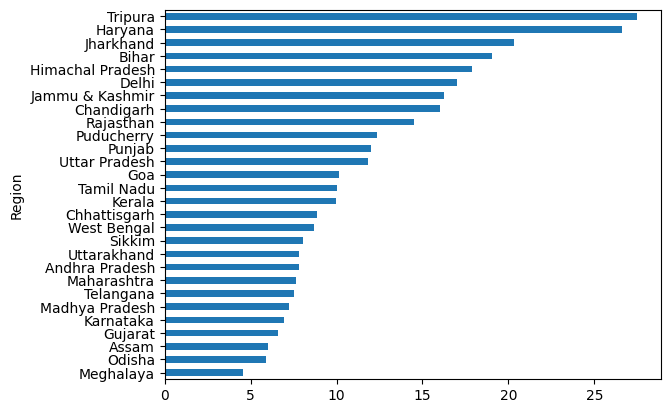

In [ ]:
data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values().plot(kind='barh')

Text(0.5, 1.0, 'Urban vs Rural Unemployment Over Time')

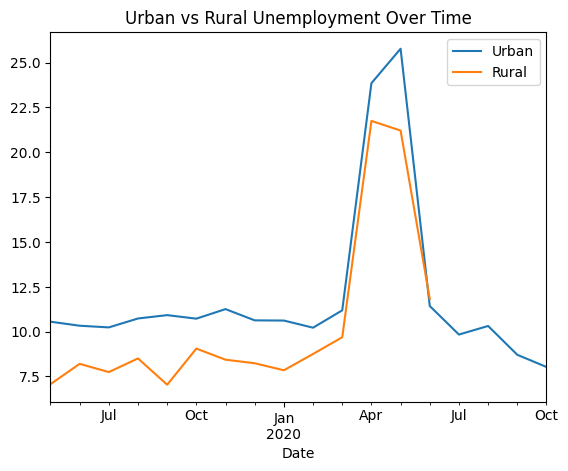

In [ ]:
urban.groupby('Date')['Estimated Unemployment Rate (%)'].mean().plot(label='Urban')
rural.groupby('Date')['Estimated Unemployment Rate (%)'].mean().plot(label='Rural')

plt.legend()
plt.title('Urban vs Rural Unemployment Over Time')


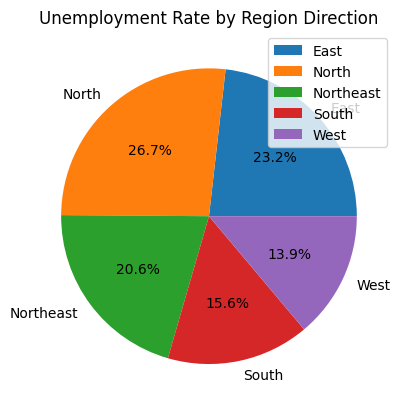

In [ ]:
plt.pie(cleaneddata.groupby('Region Direction')['Estimated Unemployment Rate (%)'].mean(), labels=cleaneddata.groupby('Region Direction')['Estimated Unemployment Rate (%)'].mean().index, autopct='%1.1f%%')
plt.title('Unemployment Rate by Region Direction')
plt.legend()

In [ ]:
cleaneddata[cleaneddata['Region Direction']=='Northeast']

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region Direction
14,Assam,2019-05-31,Monthly,4.29,11749334.0,57.39,Rural,Northeast
15,Assam,2019-06-30,Monthly,5.08,8923222.0,43.87,Rural,Northeast
16,Assam,2019-07-31,Monthly,4.26,9911534.0,48.21,Rural,Northeast
17,Assam,2019-08-31,Monthly,5.79,9292039.0,45.83,Rural,Northeast
18,Assam,2019-09-30,Monthly,4.46,11468349.0,55.67,Rural,Northeast
...,...,...,...,...,...,...,...,...
232,Tripura,2020-06-30,Monthly,21.71,1494140.0,58.85,Urban,Northeast
233,Tripura,2020-07-31,Monthly,18.24,1348849.0,50.78,Urban,Northeast
234,Tripura,2020-08-31,Monthly,27.92,1318621.0,56.21,Urban,Northeast
235,Tripura,2020-09-30,Monthly,17.35,1368244.0,50.77,Urban,Northeast


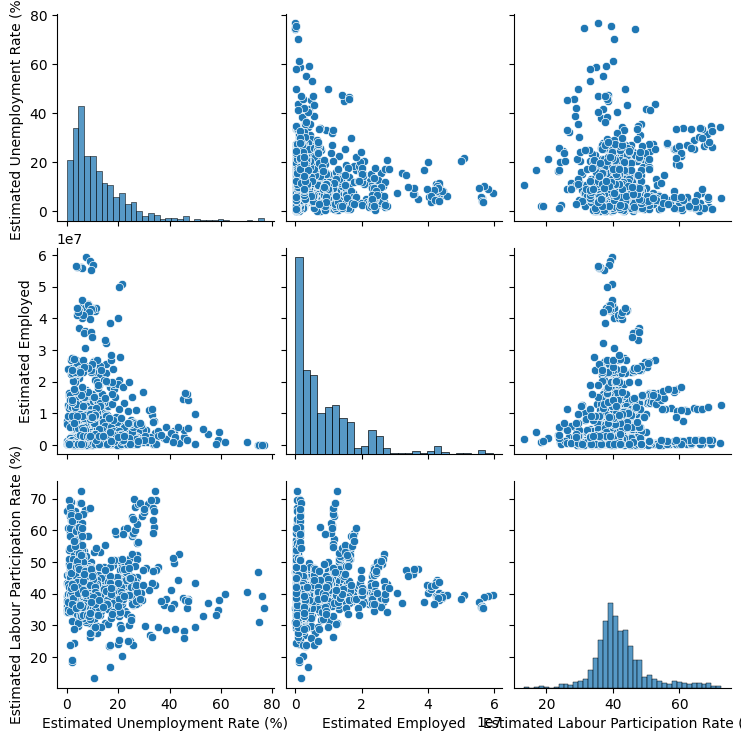

In [ ]:
cleaneddata_reset = cleaneddata.reset_index(drop=True)
sns.pairplot(cleaneddata_reset,)